In [18]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading original data

In [19]:
data = pd.read_csv('data_train.csv')
data.head()

,MFCC1_Mean,MFCC2_Mean,MFCC3_Mean,MFCC4_Mean,MFCC5_Mean,MFCC6_Mean,MFCC7_Mean,MFCC8_Mean,MFCC9_Mean,MFCC10_Mean,...,MFCC12_Var,MFCC13_Var,MFCC14_Var,MFCC15_Var,MFCC16_Var,MFCC17_Var,MFCC18_Var,MFCC19_Var,MFCC20_Var,Label
0,-93.411186,147.278046,-97.258049,83.586334,-14.802794,20.762394,-7.277999,9.453241,-0.376516,7.875620,...,43.238956,26.841871,24.928793,19.325878,27.467104,24.696417,24.235260,21.569134,23.072239,metal
1,-65.975410,114.015350,-91.296211,75.249908,-29.545425,21.402174,-17.291033,16.866028,-15.112152,12.151247,...,53.351036,41.479321,17.116251,29.222637,29.792177,17.065321,17.538721,20.774614,16.810940,metal
2,-61.660713,112.881172,-86.358490,69.170464,-25.941076,24.364878,-22.086647,18.880112,-13.000805,14.005173,...,36.167828,30.252613,23.398046,19.788950,23.081490,17.972075,23.284164,16.867950,15.886907,metal
3,-85.775391,139.275513,-91.946304,86.010201,-18.682989,25.845440,-7.294381,15.457644,-0.646857,9.919909,...,47.799232,23.859961,25.833527,18.115795,24.416447,19.360317,23.314762,18.214552,21.407824,metal
4,-104.304657,149.740524,-104.292702,81.813568,-8.931320,19.425995,-3.741026,5.969450,3.799001,7.449512,...,39.067505,31.955067,32.847073,31.047714,35.233013,16.906719,17.978216,21.101961,15.177757,metal


In [20]:
data = data.sample(frac=1, random_state = 101).reset_index(drop=True)

In [21]:
classes = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [22]:
x_data = data[data.columns[:-1]]
y_data = pd.Categorical(data['Label']).codes

In [23]:
x_train  = x_data[data.columns[:-1]][:8000]
x_val  = x_data[data.columns[:-1]][8000:]

y_train  = y_data[:8000]
y_val  = y_data[8000:]

In [24]:
scaler = StandardScaler()

scaled_tr = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_tr, columns=x_train.columns)

scaled_val = scaler.fit_transform(x_val)
x_val = pd.DataFrame(scaled_val, columns=x_val.columns)

## Neural Network Architecture

In [25]:
model = tf.keras.Sequential()

model.add(keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation= 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               20992     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [26]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x = x_train, y = y_train, validation_data= (x_val,y_val), epochs=100, batch_size = 64)

Epoch 1/100
125/125 [==============================] - 2s 6ms/step - loss: 2.2437 - accuracy: 0.1718 - val_loss: 1.8605 - val_accuracy: 0.3992
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 1.8448 - accuracy: 0.3686 - val_loss: 1.5759 - val_accuracy: 0.4608
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 1.6308 - accuracy: 0.4388 - val_loss: 1.3990 - val_accuracy: 0.5214
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 1.4962 - accuracy: 0.4730 - val_loss: 1.2856 - val_accuracy: 0.5680
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 1.4081 - accuracy: 0.5141 - val_loss: 1.1875 - val_accuracy: 0.6008
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 1.3438 - accuracy: 0.5299 - val_loss: 1.1226 - val_accuracy: 0.6266
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 1.2554 - accuracy: 0.5662 - val_loss: 1.0676 - val_accuracy: 0.6405

Epoch 58/100
125/125 [==============================] - 1s 4ms/step - loss: 0.5739 - accuracy: 0.7989 - val_loss: 0.5350 - val_accuracy: 0.8222
Epoch 59/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.8069 - val_loss: 0.5249 - val_accuracy: 0.8252
Epoch 60/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.8065 - val_loss: 0.5169 - val_accuracy: 0.8292
Epoch 61/100
125/125 [==============================] - 1s 4ms/step - loss: 0.5550 - accuracy: 0.8109 - val_loss: 0.5154 - val_accuracy: 0.8342
Epoch 62/100
125/125 [==============================] - 1s 4ms/step - loss: 0.5689 - accuracy: 0.8060 - val_loss: 0.5246 - val_accuracy: 0.8322
Epoch 63/100
125/125 [==============================] - 1s 4ms/step - loss: 0.5569 - accuracy: 0.8118 - val_loss: 0.5092 - val_accuracy: 0.8322
Epoch 64/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.8122 - val_loss: 0.5069 - val_accuracy:

# Accuracy & Loss

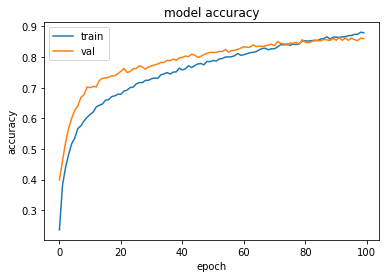

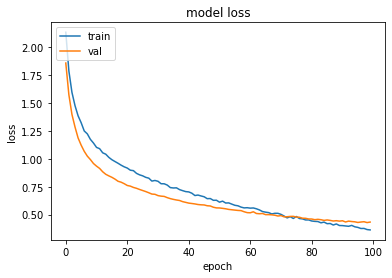

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test on YouTube data

In [28]:
data_test = pd.read_csv('data_test.csv')
data_test.head()

,MFCC1_Mean,MFCC2_Mean,MFCC3_Mean,MFCC4_Mean,MFCC5_Mean,MFCC6_Mean,MFCC7_Mean,MFCC8_Mean,MFCC9_Mean,MFCC10_Mean,...,MFCC12_Var,MFCC13_Var,MFCC14_Var,MFCC15_Var,MFCC16_Var,MFCC17_Var,MFCC18_Var,MFCC19_Var,MFCC20_Var,Label
0,-249.010376,149.310394,-38.809299,42.263432,-14.468389,10.295317,-13.667592,4.414966,-4.662990,0.519707,...,122.881081,72.274254,66.570541,259.968506,53.388855,69.137527,52.009602,167.365768,55.598461,hiphop
1,-279.474091,167.203583,-20.340523,25.866331,-15.994143,0.329006,-22.783136,-1.330112,-11.841547,2.925979,...,186.408676,110.577431,178.660934,108.807304,61.083157,99.472855,71.585411,124.691971,158.015259,hiphop
2,-296.589569,145.014938,-8.389028,32.571354,-3.660239,20.281359,-22.275860,-11.310889,-22.031324,-7.625155,...,294.384308,259.512238,209.804428,81.502647,135.450653,67.957977,68.078758,237.000793,172.157974,hiphop
3,-240.589905,161.670792,-22.104473,38.933300,-15.202853,16.041809,-19.434389,0.025945,-13.720518,-4.024367,...,76.631096,91.791725,118.611588,73.517639,123.737152,55.229832,44.574848,99.319275,107.875664,hiphop
4,-141.305054,122.189499,-54.743061,65.195763,-40.119255,14.402914,-40.423481,3.981862,-8.399135,0.515828,...,143.140717,90.704193,92.015656,54.689579,74.343674,59.269360,64.264503,74.729507,127.474457,hiphop


In [29]:
data_test.Label = [classes[l] for l in data_test.Label]

In [30]:
x_test = data_test[data_test.columns[:-1]]
y_test = data_test['Label']

scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [31]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 3.7756 - accuracy: 0.2510


[3.7755801677703857, 0.2509920597076416]

# Confusion matrix

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


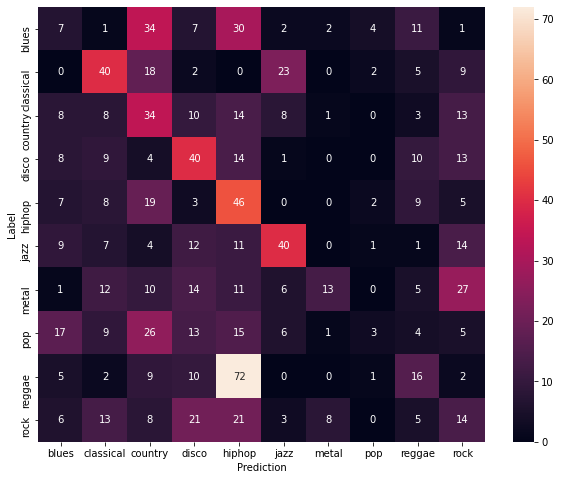

In [32]:
confusion_mtx = tf.math.confusion_matrix(y_test, model.predict_classes(x_test)) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=classes.keys(), yticklabels=classes.keys(), 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Saving model

In [33]:
model.save('models/NN')

INFO:tensorflow:Assets written to: models/NN\assets


In [34]:
print('done')

done
